# 모델 성능 평가

# ROC Curve & AUC

- Receiver Operating Characteristic Curve

- Area Under the ROC Curve

## 🔰 와인 맛 분류 모델

#### --▶ Wine 데이터셋 읽어오기

In [44]:
import pandas as pd

red_wine = pd.read_csv("../dataset/winequality-red.csv", sep=';')
white_wine = pd.read_csv("../dataset/winequality-white.csv", sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste','quality'], axis=1) #--> column drop
y = wine['taste']

#### --▶ Decision Tree 모델 적용

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train) #<--(features, labels)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr)) #--> 훈련용 데이터의 정확도
print('Test Acc:', accuracy_score(y_test, y_pred_test)) #--> 테스트용 데이터의 정확도

Train Acc: 0.7294593034442948
Test Acc: 0.7161538461538461


#### --▶ 성능 지표 구하기

- 오차 행렬(Confusion Matrix)의 요소가 사용된다.

- **정확도(Accuracy)** : (TP + TN) / (TP + TN + FP + FN)

- **정밀도(Precision)** : TP / (TP + FP)

- **재현율(Recall)** : TP / (TP + FN)

- **F1 Score** : 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

In [46]:
from sklearn.metrics import (
	accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# wine taste predict
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Percision:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1 Score:', f1_score(y_test, y_pred_test))
print('AUC Score:', roc_auc_score(y_test, y_pred_test))

Accuracy: 0.7161538461538461
Percision: 0.8026666666666666
Recall: 0.7314702308626975
F1 Score: 0.7654164017800381
AUC Score: 0.7105988470875331


#### --▶ ROC Curve 그리기

<img src="https://github.com/ElaYJ/supplement/assets/153154981/6d6aa7d3-0651-4d63-9b92-1bf0c9918619" width="67%" height="67%">

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)
print(pred_proba)

pred_proba = pred_proba[:, 1] #--> 두번째 열[1](긍정Positive:"맛있다" 확률값)만 선택

roc_curve(y_test, pred_proba)

[[0.61602594 0.38397406]
 [0.61602594 0.38397406]
 [0.12197802 0.87802198]
 ...
 [0.12197802 0.87802198]
 [0.61602594 0.38397406]
 [0.12197802 0.87802198]]


(array([0.        , 0.14884696, 0.25366876, 0.31027254, 1.        ]),
 array([0.        , 0.45078979, 0.65492102, 0.73147023, 1.        ]),
 array([       inf, 0.87802198, 0.72692794, 0.67447307, 0.38397406]))

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
print(f"Thresholds : {thresholds}") #--> threshold : 분류 임계점
print(f"FPR : {fpr}") #--> fpr : false positive rate
print(f"TPR : {tpr}") #--> tpr : true positive rate

df = pd.DataFrame(
	data = [fpr, tpr],
	index=['FPR', 'TPR'],
 	columns=thresholds
)
df.columns = pd.MultiIndex.from_tuples(
	[
		('Thresholds',thresholds[0]),
  		('Thresholds',thresholds[1]),
    	('Thresholds',thresholds[2]),
     	('Thresholds',thresholds[3]),
      	('Thresholds',thresholds[4])
	]
)
df

Thresholds : [       inf 0.87802198 0.72692794 0.67447307 0.38397406]
FPR : [0.         0.14884696 0.25366876 0.31027254 1.        ]
TPR : [0.         0.45078979 0.65492102 0.73147023 1.        ]


Thresholds                                       
      inf       0.878022  0.726928  0.674473 0.383974
FPR        0.0  0.148847  0.253669  0.310273      1.0
TPR        0.0  0.450790  0.654921  0.731470      1.0

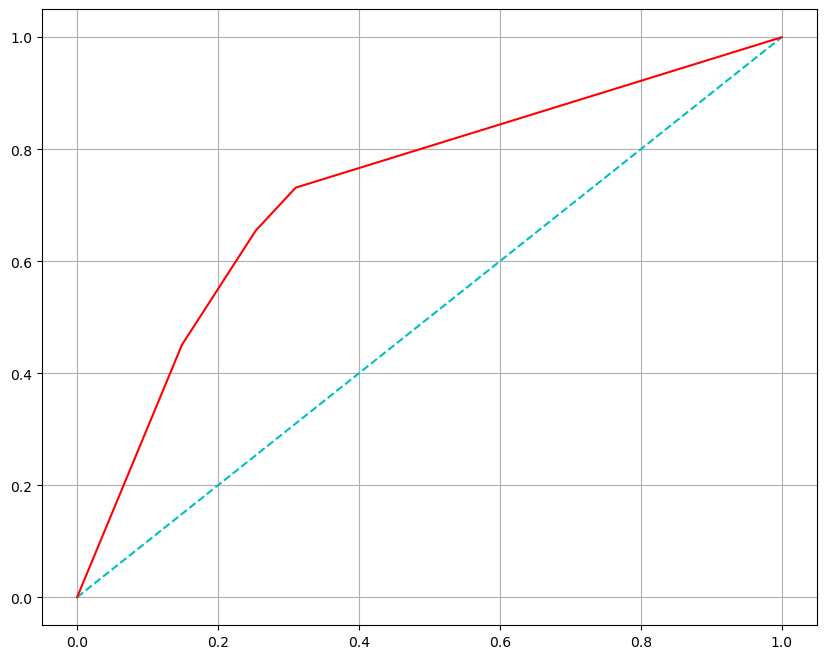

In [49]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'c', ls='dashed') #--> y=x 직선
plt.plot(fpr, tpr, 'r') #--> x: fpr, y: tpr
plt.grid()
plt.show()

<br></br>

---

# 참고. 랜덤 포레스트 분류 모델

랜덤 포레스트(Random Forest)는 머신러닝에서 널리 사용되는 앙상블 학습(Ensemble Learning) 기법 중 하나입니다.</br>
이는 여러 개의 결정 트리(Decision Tree)를 생성하고 그들의 예측을 결합하여 더 강력한 모델을 형성하는 방식입니다.

랜덤 포레스트 분류 모델의 주요 특징은 다음과 같습니다:

1. **앙상블 학습**</br>
	랜덤 포레스트는 여러 개의 결정 트리를 사용하여 각각의 예측 결과를 결합하여 최종 예측을 수행합니다.

2. **결정 트리의 다양성 증대**</br>
	각 트리는 부트스트랩 샘플(Bootstrap Sample)을 사용하여 데이터의 부분 집합에서 학습됩니다.</br>
	또한 각 노드에서 최적의 분할을 찾을 때 랜덤한 특성 부분 집합을 고려합니다.</br>
	이는 각 트리가 서로 다르게 학습되도록 하여 다양성을 증대시키고, **모델의 일반화 성능을 향상**시킵니다.

3. **안정성과 강력성**</br>
	랜덤 포레스트는 다양한 종류의 데이터와 다양한 문제에 대해 일반적으로 좋은 성능을 보이며,</br>
	과적합(Overfitting) 경향이 상대적으로 낮습니다.

4. **특성 중요도 계산**</br>
	랜덤 포레스트는 각 트리에서 분할에 사용된 특성들의 중요도를 계산할 수 있습니다.</br>
	이를 통해 입력 특성들의 상대적인 중요도를 파악할 수 있습니다.

랜덤 포레스트는 분류와 회귀 문제에 모두 사용할 수 있지만, 주로 분류 문제에 적용됩니다. </br>
데이터셋의 특성을 잘 파악하고, 모델의 매개변수를 조정하여 최적의 성능을 얻을 수 있습니다. </br>
종종 다른 모델과 함께 사용되어 앙상블 모델을 형성하여 더 강력한 예측 성능을 얻을 수 있습니다.

## 🔰 와인 종류 분류 모델

In [50]:
wine.info() # wine.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
 13  taste                 6497 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 761.4 KB


In [51]:
X = wine.drop(columns=['color'], axis=1)
y = wine['color']

#### --▶ Random Forest 모델 적용

@Param

- max_depth=1 $~\dashrightarrow~$ 각 트리의 깊이를 1로 지정

- n_estimators=10 $~\dashrightarrow~$ 총 약분류기의 갯수 10개</br>
	`n_estimators` : int, default=100   The number of trees in the forest.

- `n_jobs` : int, default=None</br>
    The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. </br>
	None means 1 unless in a joblib.parallel_backend context. `-1` means using all processors.

- `random_state` : int, RandomState instance or None, default=None</br>
    Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) </br>
	and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).</br>

- `bootstrap` : bool, default=True
    Whether bootstrap samples are used when building trees. </br>
	If False, the whole dataset is used to build each tree.


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_rf = RandomForestClassifier(max_depth=1, n_estimators=10, n_jobs=-1, random_state=2024)
wine_rf.fit(X_train, y_train) #<--(features, labels)
wine_rf.score(X_test, y_test) #--> Return the mean accuracy on the given test data and labels.
# In multi-label classification, this is the subset accuracy which is a harsh metric 
# since you require for each sample that each label set be correctly predicted.

0.9353846153846154

💡 Wine 맛 분류로 적용했더니 정확도가 대략 0.65정도로  나왔다.

#### --▶ RF에 쓰인 각 트리 시각화

- 여기서 각 트리의 노드 정보를 보면 value의 합과 samples의 값이 다르다.

	그 이유는 랜덤 포레스트가 각 트리를 중복을 허용하여 샘플링하는 부트스트랩 샘플링을 하기 때문이다.

	samples는 unique(고유한)값들을 표시하고, </br>
	value는 중복된 데이터포인트까지 count되기 때문에 value의 각 클래스의 합과 samples 값이 일치하지 않는 것이다.

In [53]:
wine_rf.estimators_, len(wine_rf.estimators_)

([DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=378019464),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                         random_state=1104465402),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=855165536),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                         random_state=1025411712),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=808106523),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=408516132),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=188156350),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                         random_state=1688125623),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=880549673),
  DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                         random_state=2092944511)],
 10)

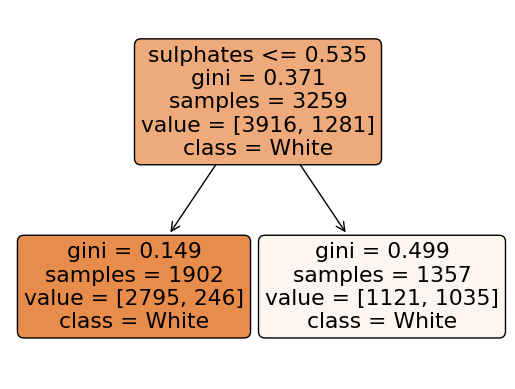

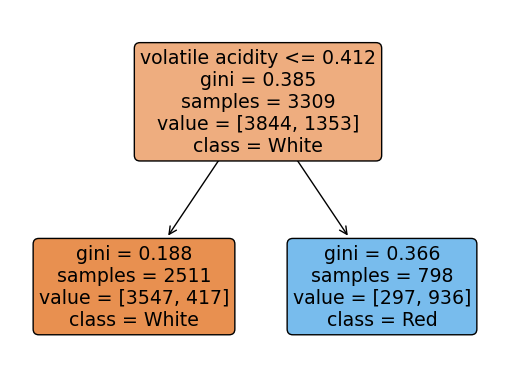

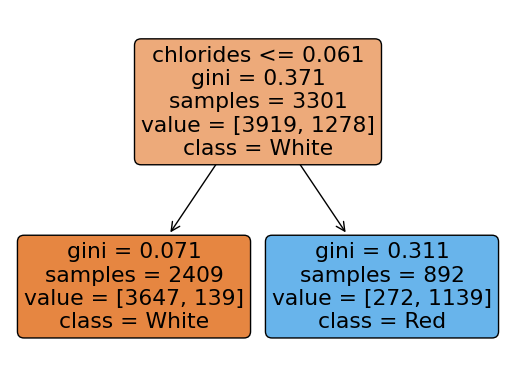

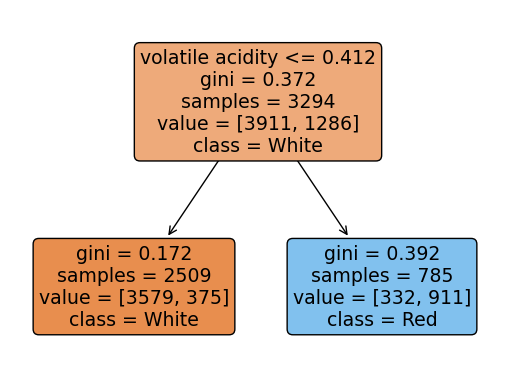

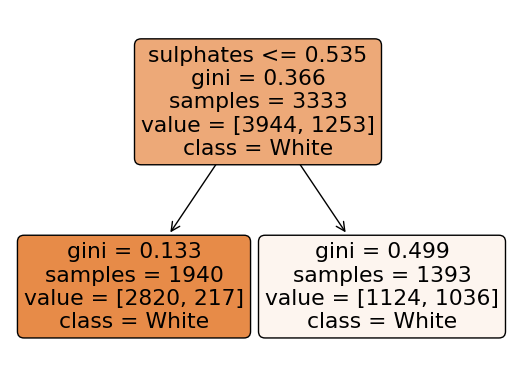

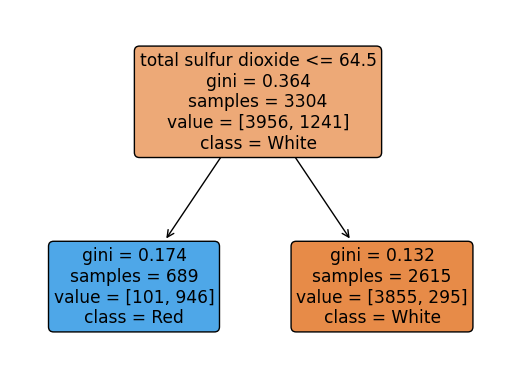

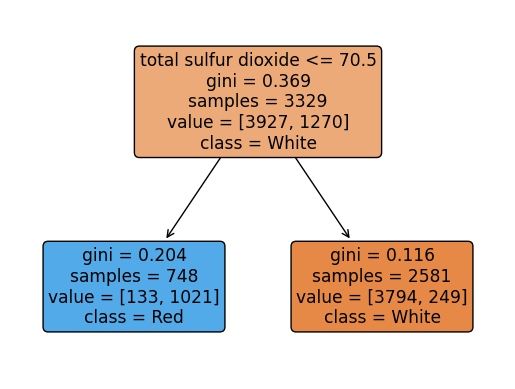

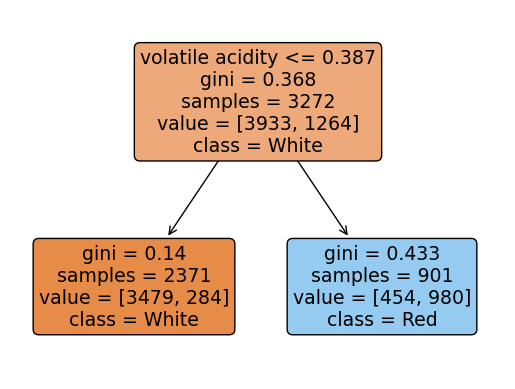

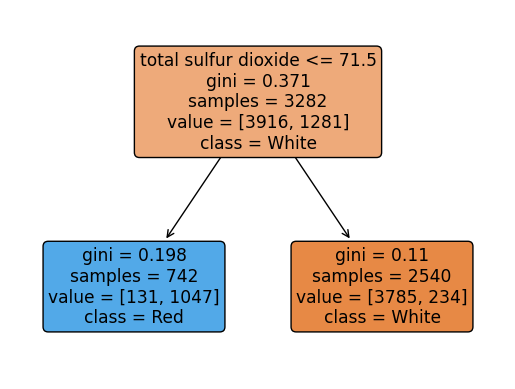

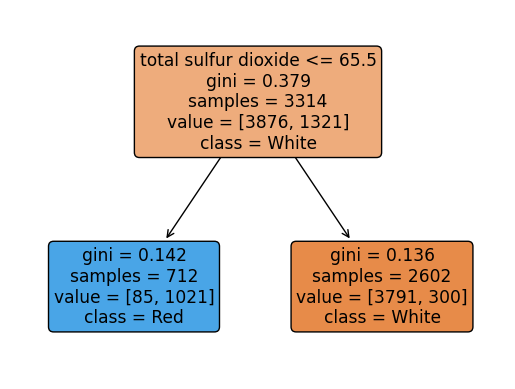

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for clf in wine_rf.estimators_:
    plot_tree(
		clf, feature_names=X.columns.tolist(), class_names=['White','Red'],
		filled=True, rounded=True, precision=3
	)
    plt.show()

#### --▶ 성능 지표 구하기

- 오차 행렬(Confusion Matrix)의 요소가 사용된다.

- **정확도(Accuracy)** : (TP + TN) / (TP + TN + FP + FN)

- **정밀도(Precision)** : TP / (TP + FP)

- **재현율(Recall)** : TP / (TP + FN)

- **F1 Score** : 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

In [55]:

y_pred_tr = wine_rf.predict(X_train)
y_pred_test = wine_rf.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr)) #--> 훈련용 데이터의 정확도
print('Test Acc:', accuracy_score(y_test, y_pred_test)) #--> 테스트용 데이터의 정확도

Train Acc: 0.9349624783528959
Test Acc: 0.9353846153846154


In [56]:
from sklearn.metrics import (
	accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# wine taste predict
print('Accuracy:', accuracy_score(y_test, y_pred_test))
print('Percision:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1 Score:', f1_score(y_test, y_pred_test))
print('AUC Score:', roc_auc_score(y_test, y_pred_test))

Accuracy: 0.9353846153846154
Percision: 0.9832635983263598
Recall: 0.746031746031746
F1 Score: 0.8483754512635379
AUC Score: 0.8709854161630812


#### --▶ ROC Curve 그리기

In [57]:
from sklearn.metrics import roc_curve

pred_proba = wine_rf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1]) #--> 두번째 열[1](긍정Positive:Red Wine일 확률값)만 선택

print(f"Thresholds : {thresholds}") #--> threshold : 분류 임계점
print(f"FPR : {fpr}") #--> fpr : false positive rate
print(f"TPR : {tpr}") #--> tpr : true positive rate

Thresholds : [       inf 0.75425693 0.67720546 0.67352305 0.67101197 0.62505784
 0.59647158 0.58603049 0.5642647  0.54800637 0.54432396 0.50371442
 0.48721323 0.48353082 0.48101974 0.46727249 0.4568314  0.42824515
 0.4206573  0.40647935 0.39603826 0.34592907 0.34360583 0.33992343
 0.31898679 0.31372219 0.29904606 0.29145821 0.26287196 0.23825292
 0.23066508 0.21440674 0.21072434 0.15593684 0.1536136  0.1499312
 0.13367287 0.07287973]
FPR : [0.         0.         0.00101523 0.00101523 0.00101523 0.00101523
 0.00304569 0.00304569 0.00304569 0.00406091 0.00406091 0.00406091
 0.0071066  0.00913706 0.00913706 0.01116751 0.01116751 0.01319797
 0.02030457 0.03350254 0.03350254 0.03451777 0.04771574 0.05482234
 0.05685279 0.05685279 0.05786802 0.06192893 0.11472081 0.11878173
 0.12893401 0.14111675 0.14314721 0.14416244 0.38375635 0.42335025
 0.44060914 1.        ]
TPR : [0.         0.38412698 0.41587302 0.50793651 0.51428571 0.55238095
 0.56825397 0.57777778 0.72380952 0.73015873 0.73650794 0

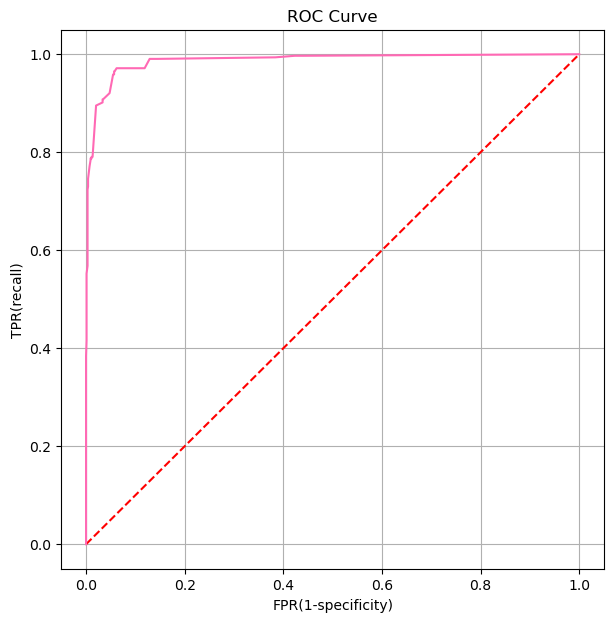

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.plot([0,1],[0,1], color = 'r',ls = '--')
plt.plot(fpr,tpr, color = 'hotpink')
plt.xlabel('FPR(1-specificity)')
plt.ylabel('TPR(recall)')
plt.title('ROC Curve')
plt.grid()
plt.show()